## **Gold Price Prediction**
In this project we are going to predict the price of the gold using our ```Artificial Neural Networks```
* We are going to use a dataset from ```kaggle```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Loading Data

In [2]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle

In [3]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

gold-price-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gold-price-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df = pd.read_csv('gld_price_data.csv')

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Data Exploratory Analysis and Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# checking nan values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# checking for duplicates
df.duplicated().sum()

0

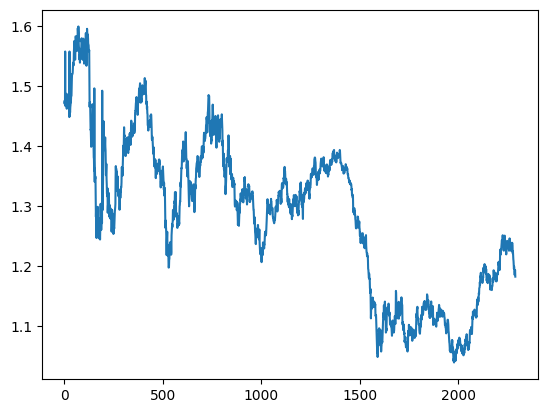

In [11]:
plt.plot(df.index, df['EUR/USD'])

<ipython-input-12-702cdebab2f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

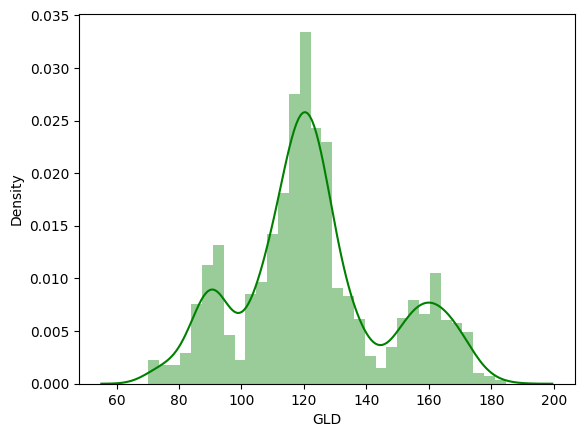

In [12]:
sns.distplot(df['GLD'], color='green')

In [13]:
# correlation
correlation = df.corr()

<ipython-input-13-f937863b5985>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

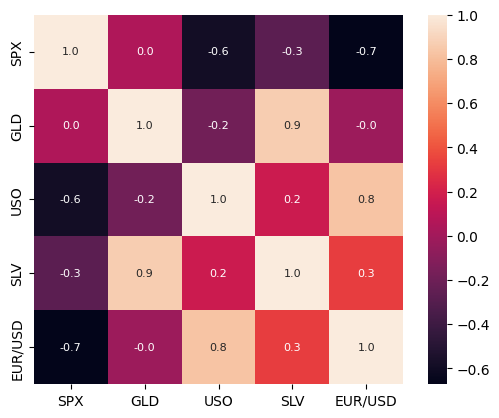

In [14]:
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.1f', annot_kws={'size':8})

In [15]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [16]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

### Splitting our data in Training and Testing data

In [17]:
X = df.drop(['EUR/USD', 'Date'], axis=1)

In [18]:
y = df['EUR/USD']

In [19]:
X

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [20]:
y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1832, 4), (1832,), (458, 4), (458,))

### Feature Scaling our Data

In [23]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-0.95609688, -0.6493039 ,  0.39284935, -0.49687641],
       [-0.5997591 , -1.44350552,  2.23547396, -0.44710215],
       [ 0.73887815, -0.95887177, -1.06726735, -0.99461906],
       ...,
       [-0.72839904,  1.08384901,  0.21299444,  2.01587542],
       [-0.85458184,  1.89683867,  0.17195731,  1.72741135],
       [ 0.8076188 , -0.46868693, -0.64372206, -0.73726349]])

In [25]:
X_test

array([[ 0.06342648,  0.24908311,  0.25707168,  0.12247382],
       [ 1.48111662, -0.31326251, -1.14174242, -0.72453711],
       [-0.67778653,  0.69443419,  0.5190009 ,  2.2633327 ],
       ...,
       [-0.87083359,  1.57616863,  0.07620365,  1.43046233],
       [-1.10379406, -0.2398205 ,  0.14865224, -0.3653704 ],
       [ 0.56552671, -0.70780168, -0.85498807, -0.86594128]])

## Building our Model and performing different experiments

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout




Model 1




In [27]:
model1 = Sequential()

model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.compile(loss=tf.keras.losses.mse,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mse'])

history1 = model1.fit(X_train, y_train, epochs=100, validation_data=(X_test,  y_test))

Epoch 1/100
58/58 [==============================] - 4s 11ms/step - loss: 0.6733 - mse: 0.6733 - val_loss: 0.1523 - val_mse: 0.1523
Epoch 2/100
58/58 [==============================] - 0s 6ms/step - loss: 0.1017 - mse: 0.1017 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0020 - 

Model 2

In [28]:
model2 = Sequential()

model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss=tf.keras.losses.mse,
               optimizer=tf.keras.optimizers.Adam(0.0001),
               metrics=['mse'])

history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test,  y_test))

Epoch 1/100
58/58 [==============================] - 2s 7ms/step - loss: 1.8238 - mse: 1.8238 - val_loss: 1.5639 - val_mse: 1.5639
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 1.3432 - mse: 1.3432 - val_loss: 1.1627 - val_mse: 1.1627
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 0.9808 - mse: 0.9808 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6626 - mse: 0.6626 - val_loss: 0.5258 - val_mse: 0.5258
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 0.3986 - mse: 0.3986 - val_loss: 0.3088 - val_mse: 0.3088
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 0.2420 - mse: 0.2420 - val_loss: 0.2087 - val_mse: 0.2087
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 0.1831 - mse: 0.1831 - val_loss: 0.1755 - val_mse: 0.1755
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 0.1613 - m

Model 3

In [33]:
model3 = Sequential()

model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='linear'))

model3.compile(loss=tf.keras.losses.mse,
               optimizer=tf.keras.optimizers.Adam(0.0001),
               metrics=['mse'])

history3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_test,  y_test))

Epoch 1/100
58/58 [==============================] - 3s 7ms/step - loss: 1.3159 - mse: 1.3159 - val_loss: 0.7958 - val_mse: 0.7958
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 0.4216 - mse: 0.4216 - val_loss: 0.1877 - val_mse: 0.1877
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1249 - val_mse: 0.1249
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0762 - mse: 0.0762 - val_loss: 0.0588 - val_mse: 0.0588
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0477 - mse: 0.0477 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0163 - m

## Evaluating all our models

In [29]:
# Evaluating Model1
model1.evaluate(X_test, y_test)

15/15 [==============================] - 0s 7ms/step - loss: 8.7495e-04 - mse: 8.7495e-04


[0.0008749502012506127, 0.0008749502012506127]

In [30]:
y_preds = model1.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.9453553536658873

In [34]:
print(f'MAE Score : {tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))}')
print(f'MSE Score : {tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))}')
print(f'RMSE Score : {tf.sqrt(tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds)))}')

MAE Score : 0.021766938269138336
MSE Score : 0.0008749502012506127
RMSE Score : 0.029579557478427887


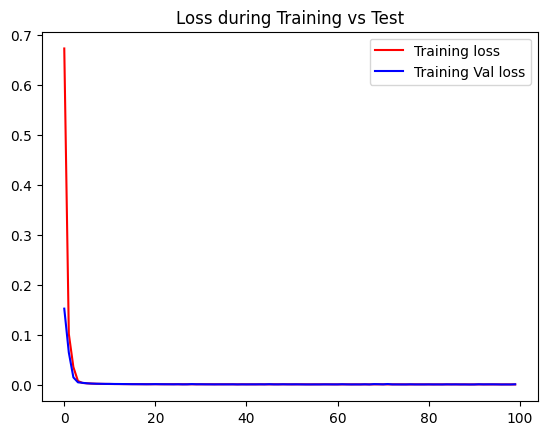

In [35]:
plt.title('Loss during Training vs Test')
plt.plot(history1.history['loss'], color='red', label = 'Training loss')
plt.plot(history1.history['val_loss'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

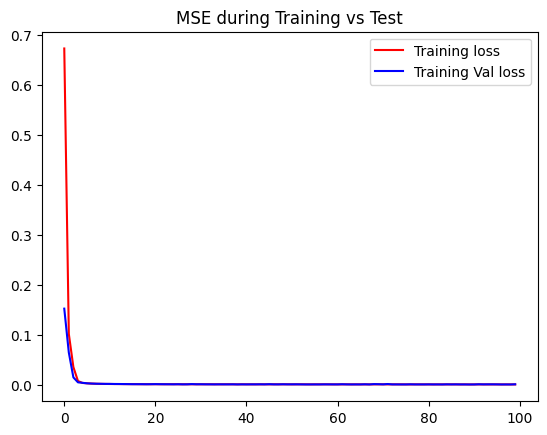

In [40]:
plt.title('MSE during Training vs Test')
plt.plot(history1.history['mse'], color='red', label = 'Training loss')
plt.plot(history1.history['val_mse'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

In [36]:
# Evaluating Model2
model2.evaluate(X_test, y_test)

15/15 [==============================] - 0s 5ms/step - loss: 7.8396e-04 - mse: 7.8396e-04


[0.0007839606259949505, 0.0007839606259949505]

In [37]:
y_preds2 = model2.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds2)

0.9510380697605109

In [39]:
print(f'MAE Score : {tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds2))}')
print(f'MSE Score : {tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds2))}')
print(f'RMSE Score : {tf.sqrt(tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds2)))}')

MAE Score : 0.021098047494888306
MSE Score : 0.0007839605677872896
RMSE Score : 0.02799929492175579


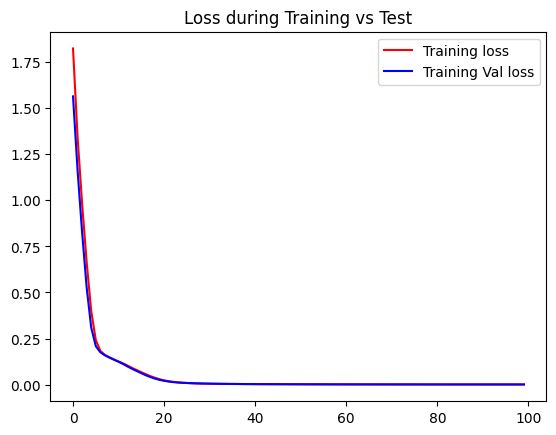

In [41]:
plt.title('Loss during Training vs Test')
plt.plot(history2.history['loss'], color='red', label = 'Training loss')
plt.plot(history2.history['val_loss'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

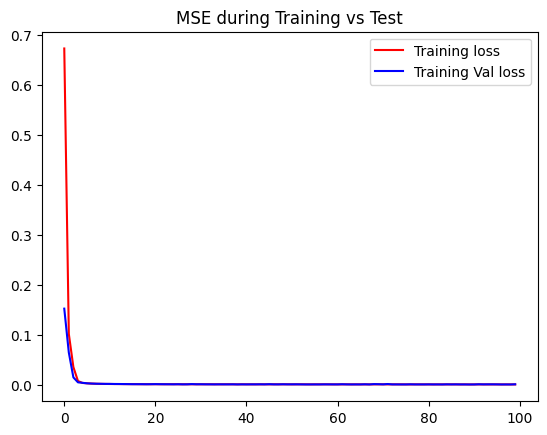

In [43]:
plt.title('MSE during Training vs Test')
plt.plot(history1.history['mse'], color='red', label = 'Training loss')
plt.plot(history1.history['val_mse'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

In [44]:
# Evaluating Model3
model3.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 5.7806e-04 - mse: 5.7806e-04


[0.0005780579522252083, 0.0005780579522252083]

In [45]:
y_preds3 = model3.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds3)

0.9638976345012444

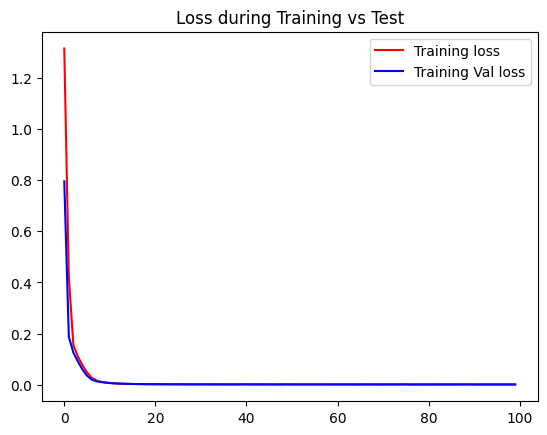

In [48]:
plt.title('Loss during Training vs Test')
plt.plot(history3.history['loss'], color='red', label = 'Training loss')
plt.plot(history3.history['val_loss'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

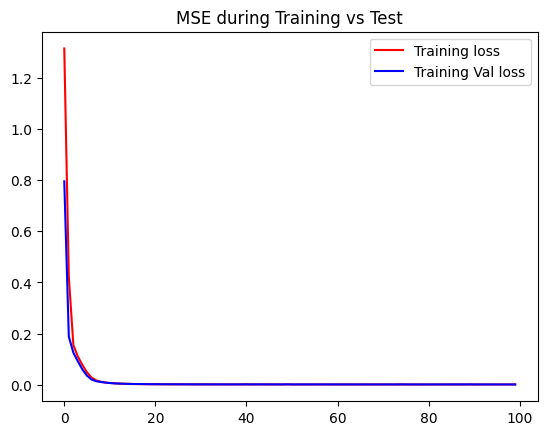

In [49]:
plt.title('MSE during Training vs Test')
plt.plot(history3.history['mse'], color='red', label = 'Training loss')
plt.plot(history3.history['val_mse'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

In [51]:
print(f'MAE Score : {tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds3))}')
print(f'MSE Score : {tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds3))}')
print(f'RMSE Score : {tf.sqrt(tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds3)))}')

MAE Score : 0.01814211718738079
MSE Score : 0.0005780579522252083
RMSE Score : 0.02404283545911312


> 🔑 **Note :** As we can say that the model3 is performing way better than model1 and model2, which is proven by all the Evaluation methods  like ```MSE```, ```MAE```, ```RMSE``` and ```R2 Score```

## Writing a helper function to help us in making single predictions

In [67]:
def single_prediction(index):
  y_true = y_test.iloc[index]
  params = []
  for param in X_test[index]:
    params.append(param)
  input_tensor = tf.expand_dims(tf.constant(params), axis=0)
  y_preds = model3.predict(input_tensor)
  print(f'Y True : {y_true}')
  print(f'Y preds : {y_preds}')
  print(f'MAE Score : {tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))}')
  print(f'MSE Score : {tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))}')
  print(f'RMSE Score : {tf.sqrt(tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds)))}')

In [69]:
single_prediction(index=3)

1/1 [==============================] - 0s 20ms/step
Y True : 1.361804
Y preds : [[1.3556888]]
MAE Score : 0.1132097840309143
MSE Score : 0.020939718931913376
RMSE Score : 0.1447056233882904


In [70]:
single_prediction(index=56)

1/1 [==============================] - 0s 27ms/step
Y True : 1.084599
Y preds : [[1.0962508]]
MAE Score : 0.19314086437225342
MSE Score : 0.05182255059480667
RMSE Score : 0.2276456654071808


In [72]:
single_prediction(index=457)

1/1 [==============================] - 0s 61ms/step
Y True : 1.129089
Y preds : [[1.1047565]]
MAE Score : 0.18637052178382874
MSE Score : 0.04867570102214813
RMSE Score : 0.22062569856643677


## Saving the Best Model

In [74]:
model3.save('gold_predictor_model3.h5')